In [1]:
import nltk
import re

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

from nltk.corpus import stopwords

from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data_file = 'DSP453_ClassCorpus.csv'

In [3]:
class_corpus = pd.read_csv(data_file)

In [4]:
class_corpus.head()

,FileName,StudentName,Genre,ReviewType,MovieTitle,MovieReview
0,KHS_Doc1_TheRing,KHS,Horror,Negative,The Ring,"Described as a drama, horror and mystery, The ..."
1,KHS_Doc2_TheRing,KHS,Horror,Negative,The Ring,"I hated it, but I grant that it does tap into..."
2,KHS_Doc3_TheRing,KHS,Horror,Negative,The Ring,Ehren Kruger (no relation to Freddy) showed a ...
3,KHS_Doc4_TheRing,KHS,Horror,Negative,The Ring,Not all arthouse thrillers are destined to be ...
4,KHS_Doc5_TheRing,KHS,Horror,Negative,The Ring,Rarely has a more serious effort produced a le...


In [5]:
class_corpus.MovieTitle.unique()

array(['The Ring', 'Speed racer', 'Arrival', 'Hereditary',
       'James Bond Casino Royale', 'Us', 'Baby Driver', 'The Conjuring 3',
       'Pirates of the Carribean: The Curse of the Black Pearl',
       'Mission Impossible Fallout', 'IT', 'Interstellar',
       'Once upon a time in Hollywood', 'Cruella', 'Spider Man 3',
       'Frozen II', 'The Matrix Resurrections', 'Red Notice',
       'The Martian'], dtype=object)

In [6]:
SAMPLE_MOVIE_TITLE = 'James Bond Casino Royale'

In [7]:
movie_title_flag = class_corpus['MovieTitle'] == SAMPLE_MOVIE_TITLE

In [8]:
sample_reviews_corpus = class_corpus.loc[movie_title_flag, ['FileName', 'MovieReview']]

In [9]:
sample_reviews_corpus

,FileName,MovieReview
40,GDO_Doc1_JamesBondCasinoRoyale,Sometimes a film speaks most clearly in what i...
41,GDO_Doc2_JamesBondCasinoRoyale,Daniel Craig enters the picture as Casino Roya...
42,GDO_Doc3_JamesBondCasinoRoyale,Casino Royale saw the debut of both Daniel Cra...
43,GDO_Doc4_JamesBondCasinoRoyale,This was the basis for how Casino Royale came ...
44,GDO_Doc5_JamesBondCasinoRoyale,"15 years ago today (16th November, 2021), the ..."
45,GDO_Doc6_JamesBondCasinoRoyale,"In the new film, the first version of Flemings..."
46,GDO_Doc7_JamesBondCasinoRoyale,The introduction of a new James Bond always br...
47,GDO_Doc8_JamesBondCasinoRoyale,After the lackluster previous three Bond entri...
48,GDO_Doc9_JamesBondCasinoRoyale,"Anyhow, with some of this in mind, I went alon..."
49,GDO_Doc10_JamesBondCasinoRoyale,So what are the commonalities between CR 2006 ...


In [10]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [11]:
def remove_punctuation(text):
    return re.sub('[^a-zA-Z]', ' ', str(text))

def lower_case(text):
    return text.lower()    

def remove_tags(text):    
    return re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

def remove_special_chars_and_digits(text):
    return re.sub("(\\d|\\W)+"," ", text)

def remove_stop_words(tokenized_text):
    return [w for w in tokenized_text if not w in stop_words]

def normalize_text(text: str) -> str:
    text = remove_punctuation(text)
    text = lower_case(text)
    text = remove_tags(text)
    text = remove_special_chars_and_digits(text)
    
    return text

In [12]:
sample_reviews_corpus['normalized_review_text'] = sample_reviews_corpus['MovieReview'].apply(normalize_text)

In [13]:
sample_reviews_corpus

,FileName,MovieReview,normalized_review_text
40,GDO_Doc1_JamesBondCasinoRoyale,Sometimes a film speaks most clearly in what i...,sometimes a film speaks most clearly in what i...
41,GDO_Doc2_JamesBondCasinoRoyale,Daniel Craig enters the picture as Casino Roya...,daniel craig enters the picture as casino roya...
42,GDO_Doc3_JamesBondCasinoRoyale,Casino Royale saw the debut of both Daniel Cra...,casino royale saw the debut of both daniel cra...
43,GDO_Doc4_JamesBondCasinoRoyale,This was the basis for how Casino Royale came ...,this was the basis for how casino royale came ...
44,GDO_Doc5_JamesBondCasinoRoyale,"15 years ago today (16th November, 2021), the ...",years ago today th november the st james bond...
45,GDO_Doc6_JamesBondCasinoRoyale,"In the new film, the first version of Flemings...",in the new film the first version of flemings ...
46,GDO_Doc7_JamesBondCasinoRoyale,The introduction of a new James Bond always br...,the introduction of a new james bond always br...
47,GDO_Doc8_JamesBondCasinoRoyale,After the lackluster previous three Bond entri...,after the lackluster previous three bond entri...
48,GDO_Doc9_JamesBondCasinoRoyale,"Anyhow, with some of this in mind, I went alon...",anyhow with some of this in mind i went along ...
49,GDO_Doc10_JamesBondCasinoRoyale,So what are the commonalities between CR 2006 ...,so what are the commonalities between cr and c...


# Count Vectorizer

## Sample

In [14]:
vectorizer_count = CountVectorizer(stop_words=stop_words)

In [15]:
dtm_sample = vectorizer_count.fit_transform(sample_reviews_corpus['normalized_review_text'])

In [16]:
vectorizer_count.get_feature_names_out()

array(['abkarian', 'able', 'ably', ..., 'youd', 'young', 'youve'],
      dtype=object)

In [17]:
dtm_sample.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 2, 0]])

In [18]:
word_counts_sample = pd.DataFrame(dtm_sample.toarray(), 
                                  columns=vectorizer_count.get_feature_names_out(), 
                                  index=sample_reviews_corpus.index)

In [19]:
word_counts_sample['spy']

40    2
41    0
42    0
43    2
44    2
45    0
46    1
47    0
48    0
49    0
Name: spy, dtype: int64

In [20]:
INPUT_WORD_FOR_EXPLORATION = 'spy'

In [21]:
word_counts_sample[INPUT_WORD_FOR_EXPLORATION].mean()

0.7

## Corpus

In [22]:
class_corpus_copy = class_corpus.copy()

In [23]:
class_corpus_copy['normalized_review_text'] = class_corpus_copy['MovieReview'].apply(normalize_text)
vectorizer_count = CountVectorizer(stop_words=stop_words)
dtm_corpus = vectorizer_count.fit_transform(class_corpus_copy['normalized_review_text'])

word_counts_corpus = pd.DataFrame(dtm_corpus.toarray(), 
                                  columns=vectorizer_count.get_feature_names_out(), 
                                  index=class_corpus_copy.index)

In [24]:
INPUT_WORD_FOR_EXPLORATION

'spy'

In [25]:
word_counts_corpus[INPUT_WORD_FOR_EXPLORATION].mean()

0.07368421052631578

# TF-IDF Vectorizer

## Sample

In [26]:
vectorizer_tfidf = TfidfVectorizer(stop_words=stop_words)

In [27]:
dtm_sample = vectorizer_tfidf.fit_transform(sample_reviews_corpus['normalized_review_text'])

In [28]:
vectorizer_tfidf.get_feature_names_out()

array(['abkarian', 'able', 'ably', ..., 'youd', 'young', 'youve'],
      dtype=object)

In [29]:
dtm_sample.toarray()

array([[0.        , 0.03045192, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04255746, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04024992, 0.        , ..., 0.        , 0.09469551,
        0.        ]])

In [30]:
tfidf_scores_sample = pd.DataFrame(dtm_sample.toarray(), 
                                   columns=vectorizer_tfidf.get_feature_names_out(), 
                                   index=sample_reviews_corpus.index)

In [31]:
tfidf_scores_sample

,abkarian,able,ably,abrupt,absolutely,accidentally,accompanied,accorded,according,account,...,wrong,wry,yawn,year,years,yes,yet,youd,young,youve
40,0.000000,0.030452,0.000000,0.035822,0.000000,0.000000,0.035822,0.000000,0.071644,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.047373,0.021272,0.000000,0.000000,0.000000
41,0.042557,0.000000,0.000000,0.000000,0.074465,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.037233,0.000000,0.000000,0.000000,0.000000,0.000000
42,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074358,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.024584,0.044155,0.000000,0.000000,0.000000
43,0.000000,0.000000,0.000000,0.000000,0.022416,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030141,0.000000,0.000000,0.000000,0.022416,0.000000,0.017898,0.000000,0.000000,0.000000
44,0.000000,0.000000,0.047722,0.000000,0.070985,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.047722,0.106477,0.031555,0.000000,0.000000,0.000000,0.000000
45,0.000000,0.000000,0.000000,0.000000,0.000000,0.049429,0.000000,0.049429,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049429,0.000000,0.049429
46,0.038425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
47,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
48,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.038716,0.000000,0.000000,0.000000,0.000000,0.022990,0.000000,0.000000,0.000000
49,0.000000,0.040250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.047348,0.000000,0.000000,0.031308,0.028116,0.000000,0.094696,0.000000


In [32]:
INPUT_WORD_FOR_EXPLORATION = 'spy'

In [33]:
tfidf_scores_sample[INPUT_WORD_FOR_EXPLORATION]

40    0.047373
41    0.000000
42    0.000000
43    0.039860
44    0.063111
45    0.000000
46    0.029889
47    0.000000
48    0.000000
49    0.000000
Name: spy, dtype: float64

In [34]:
tfidf_scores_sample[INPUT_WORD_FOR_EXPLORATION].mean()

0.018023185152061548

## Corpus

In [35]:
class_corpus_copy = class_corpus.copy()

In [36]:
class_corpus_copy['normalized_review_text'] = class_corpus_copy['MovieReview'].apply(normalize_text)
vectorizer_tfidf = TfidfVectorizer(stop_words=stop_words)
dtm_corpus = vectorizer_tfidf.fit_transform(class_corpus_copy['normalized_review_text'])

tfidf_scores_corpus = pd.DataFrame(dtm_corpus.toarray(), 
                                   columns=vectorizer_tfidf.get_feature_names_out(), 
                                   index=class_corpus_copy.index)

In [37]:
tfidf_scores_corpus[INPUT_WORD_FOR_EXPLORATION].mean()

0.002259827092617493

In [38]:
(tfidf_scores_corpus.mean()
                    .sort_values(ascending=False)
                    .head(10))

film      0.047998
movie     0.037112
one       0.034911
bond      0.032235
like      0.029353
time      0.023447
us        0.021314
action    0.020591
matrix    0.020376
films     0.019989
dtype: float64

# Word2Vec vectorizer

In [39]:
top100_tokens_tfidf = (tfidf_scores_corpus.mean()
                                          .sort_values(ascending=False)
                                          .head(100)
                                          .index)

In [40]:
class_corpus_copy = (class_corpus.copy()
                                 .loc[:,['FileName', 'MovieReview']])

In [41]:
class_corpus_copy['normalized_review_text'] = class_corpus_copy['MovieReview'].apply(normalize_text)
class_corpus_copy['normalized_review_tokens'] = class_corpus_copy['normalized_review_text'].apply(nltk.word_tokenize)
class_corpus_copy['normalized_review_tokens'] = class_corpus_copy['normalized_review_tokens'].apply(remove_stop_words)

In [42]:
class_corpus_copy.head()

,FileName,MovieReview,normalized_review_text,normalized_review_tokens
0,KHS_Doc1_TheRing,"Described as a drama, horror and mystery, The ...",described as a drama horror and mystery the ri...,"[described, drama, horror, mystery, ring, horr..."
1,KHS_Doc2_TheRing,"I hated it, but I grant that it does tap into...",i hated it but i grant that it does tap into ...,"[hated, grant, tap, vein, technological, horro..."
2,KHS_Doc3_TheRing,Ehren Kruger (no relation to Freddy) showed a ...,ehren kruger no relation to freddy showed a ge...,"[ehren, kruger, relation, freddy, showed, genu..."
3,KHS_Doc4_TheRing,Not all arthouse thrillers are destined to be ...,not all arthouse thrillers are destined to be ...,"[arthouse, thrillers, destined, ruined, hollyw..."
4,KHS_Doc5_TheRing,Rarely has a more serious effort produced a le...,rarely has a more serious effort produced a le...,"[rarely, serious, effort, produced, less, seri..."


In [43]:
model_word2vec = Word2Vec(sentences=class_corpus_copy.normalized_review_tokens,
                          size=100,
                          min_count=1)

In [44]:
model_word2vec.wv['film']

array([-4.2410302e-01, -2.0062084e-01, -6.3439143e-01, -9.3693584e-03,
        1.3698424e-01, -3.9179039e-01,  1.8510719e-01, -5.5457133e-01,
        2.3502164e-01, -7.1540403e-01,  5.3944248e-01,  2.7643470e-02,
       -4.1522384e-02, -6.1033335e-02,  3.0540448e-02, -1.1617181e-01,
       -7.1712486e-02, -5.3056365e-01, -2.7467480e-01, -3.4661341e-01,
       -2.2664033e-01,  2.5238296e-01,  1.2604644e-02, -6.1114351e-03,
       -7.6622590e-02,  5.8520192e-01, -1.7474972e-01, -4.3406125e-02,
        6.4175028e-01, -1.5668584e-01, -2.3885040e-02, -3.3914182e-01,
        2.1494594e-01,  5.1511896e-01,  4.2417815e-01,  7.2722733e-03,
        2.8813982e-01, -2.8786969e-01, -6.8628915e-02,  2.8345516e-01,
       -1.6835563e-02, -7.6769155e-01, -5.4173402e-02, -3.1043366e-01,
       -1.2066330e-01, -2.6876906e-01, -7.5340873e-01, -1.1194940e-01,
       -2.1290481e-01, -2.9834561e-02,  1.8984567e-01, -3.4648675e-01,
        4.3128726e-01, -6.0646962e-02,  1.0262594e-02,  3.1085637e-01,
      

In [45]:
model_word2vec.wv['film'].shape

(100,)

In [46]:
top100_tokens_tfidf_vectors = {token: model_word2vec.wv[token] 
                               for token in top100_tokens_tfidf}

In [47]:
top100_tfidf_word_vectors = (pd.DataFrame(top100_tokens_tfidf_vectors)
                               .transpose())

In [48]:
top100_tfidf_word_vectors

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
film,-0.424103,-0.200621,-0.634391,-0.009369,0.136984,-0.391790,0.185107,-0.554571,0.235022,-0.715404,...,-0.175005,-0.022793,0.605532,0.107798,-0.286728,0.400871,-0.259223,0.346777,0.091890,0.132935
movie,-0.357516,-0.167273,-0.536880,-0.006669,0.108578,-0.329833,0.154632,-0.469727,0.197460,-0.599649,...,-0.144089,-0.019921,0.501904,0.094591,-0.239525,0.336321,-0.210055,0.289360,0.080138,0.106674
one,-0.368312,-0.176069,-0.553331,-0.006351,0.118489,-0.350917,0.159620,-0.484568,0.214180,-0.623691,...,-0.147604,-0.021464,0.525447,0.093567,-0.252597,0.353237,-0.221370,0.305889,0.080479,0.114219
bond,-0.311641,-0.141334,-0.465417,-0.004766,0.093550,-0.287692,0.125503,-0.410849,0.174675,-0.516892,...,-0.131909,-0.013320,0.442223,0.078736,-0.211900,0.292277,-0.180082,0.246612,0.072921,0.097045
like,-0.362139,-0.165082,-0.527893,-0.011645,0.116189,-0.338087,0.145937,-0.469587,0.202815,-0.595272,...,-0.149803,-0.018216,0.504664,0.087176,-0.237644,0.333630,-0.218167,0.289628,0.083335,0.113424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
things,-0.123259,-0.054636,-0.179786,-0.006978,0.032489,-0.117195,0.046750,-0.152383,0.069245,-0.204483,...,-0.051816,-0.001866,0.168174,0.027606,-0.075280,0.113844,-0.067146,0.095246,0.028980,0.032049
music,-0.099396,-0.045971,-0.145454,-0.006848,0.030704,-0.093609,0.046950,-0.125423,0.051617,-0.166833,...,-0.038912,-0.008283,0.137192,0.023672,-0.062287,0.090394,-0.061578,0.080238,0.025085,0.033603
set,-0.125394,-0.065564,-0.195615,-0.000832,0.034711,-0.121179,0.050785,-0.172598,0.076655,-0.215363,...,-0.053352,-0.010358,0.179701,0.036250,-0.084211,0.125034,-0.076784,0.103028,0.027677,0.036993
though,-0.121567,-0.055185,-0.185279,-0.003114,0.041002,-0.117117,0.049592,-0.157804,0.066608,-0.210656,...,-0.054971,-0.001770,0.174703,0.027834,-0.083592,0.115449,-0.069144,0.100739,0.029320,0.037612


In [49]:
top100_tfidf_word_vectors.to_csv('top100_tfidf_wv.tsv', 
                                 sep='\t',
                                 header=False,
                                 index=False)

In [50]:
with open('top100_tfidf_labels.txt', 'w') as f:
    for item in top100_tfidf_word_vectors.index:
        f.write("%s\n" % item)

These word vectors can then be visualized by uploading to the tensorflow projector. 

https://projector.tensorflow.org/

Once word vectors are generated, we can then compute the cosine similarity between each pair of word vectors

In [51]:
similarities = cosine_similarity(top100_tfidf_word_vectors, 
                                 top100_tfidf_word_vectors)

<AxesSubplot:>

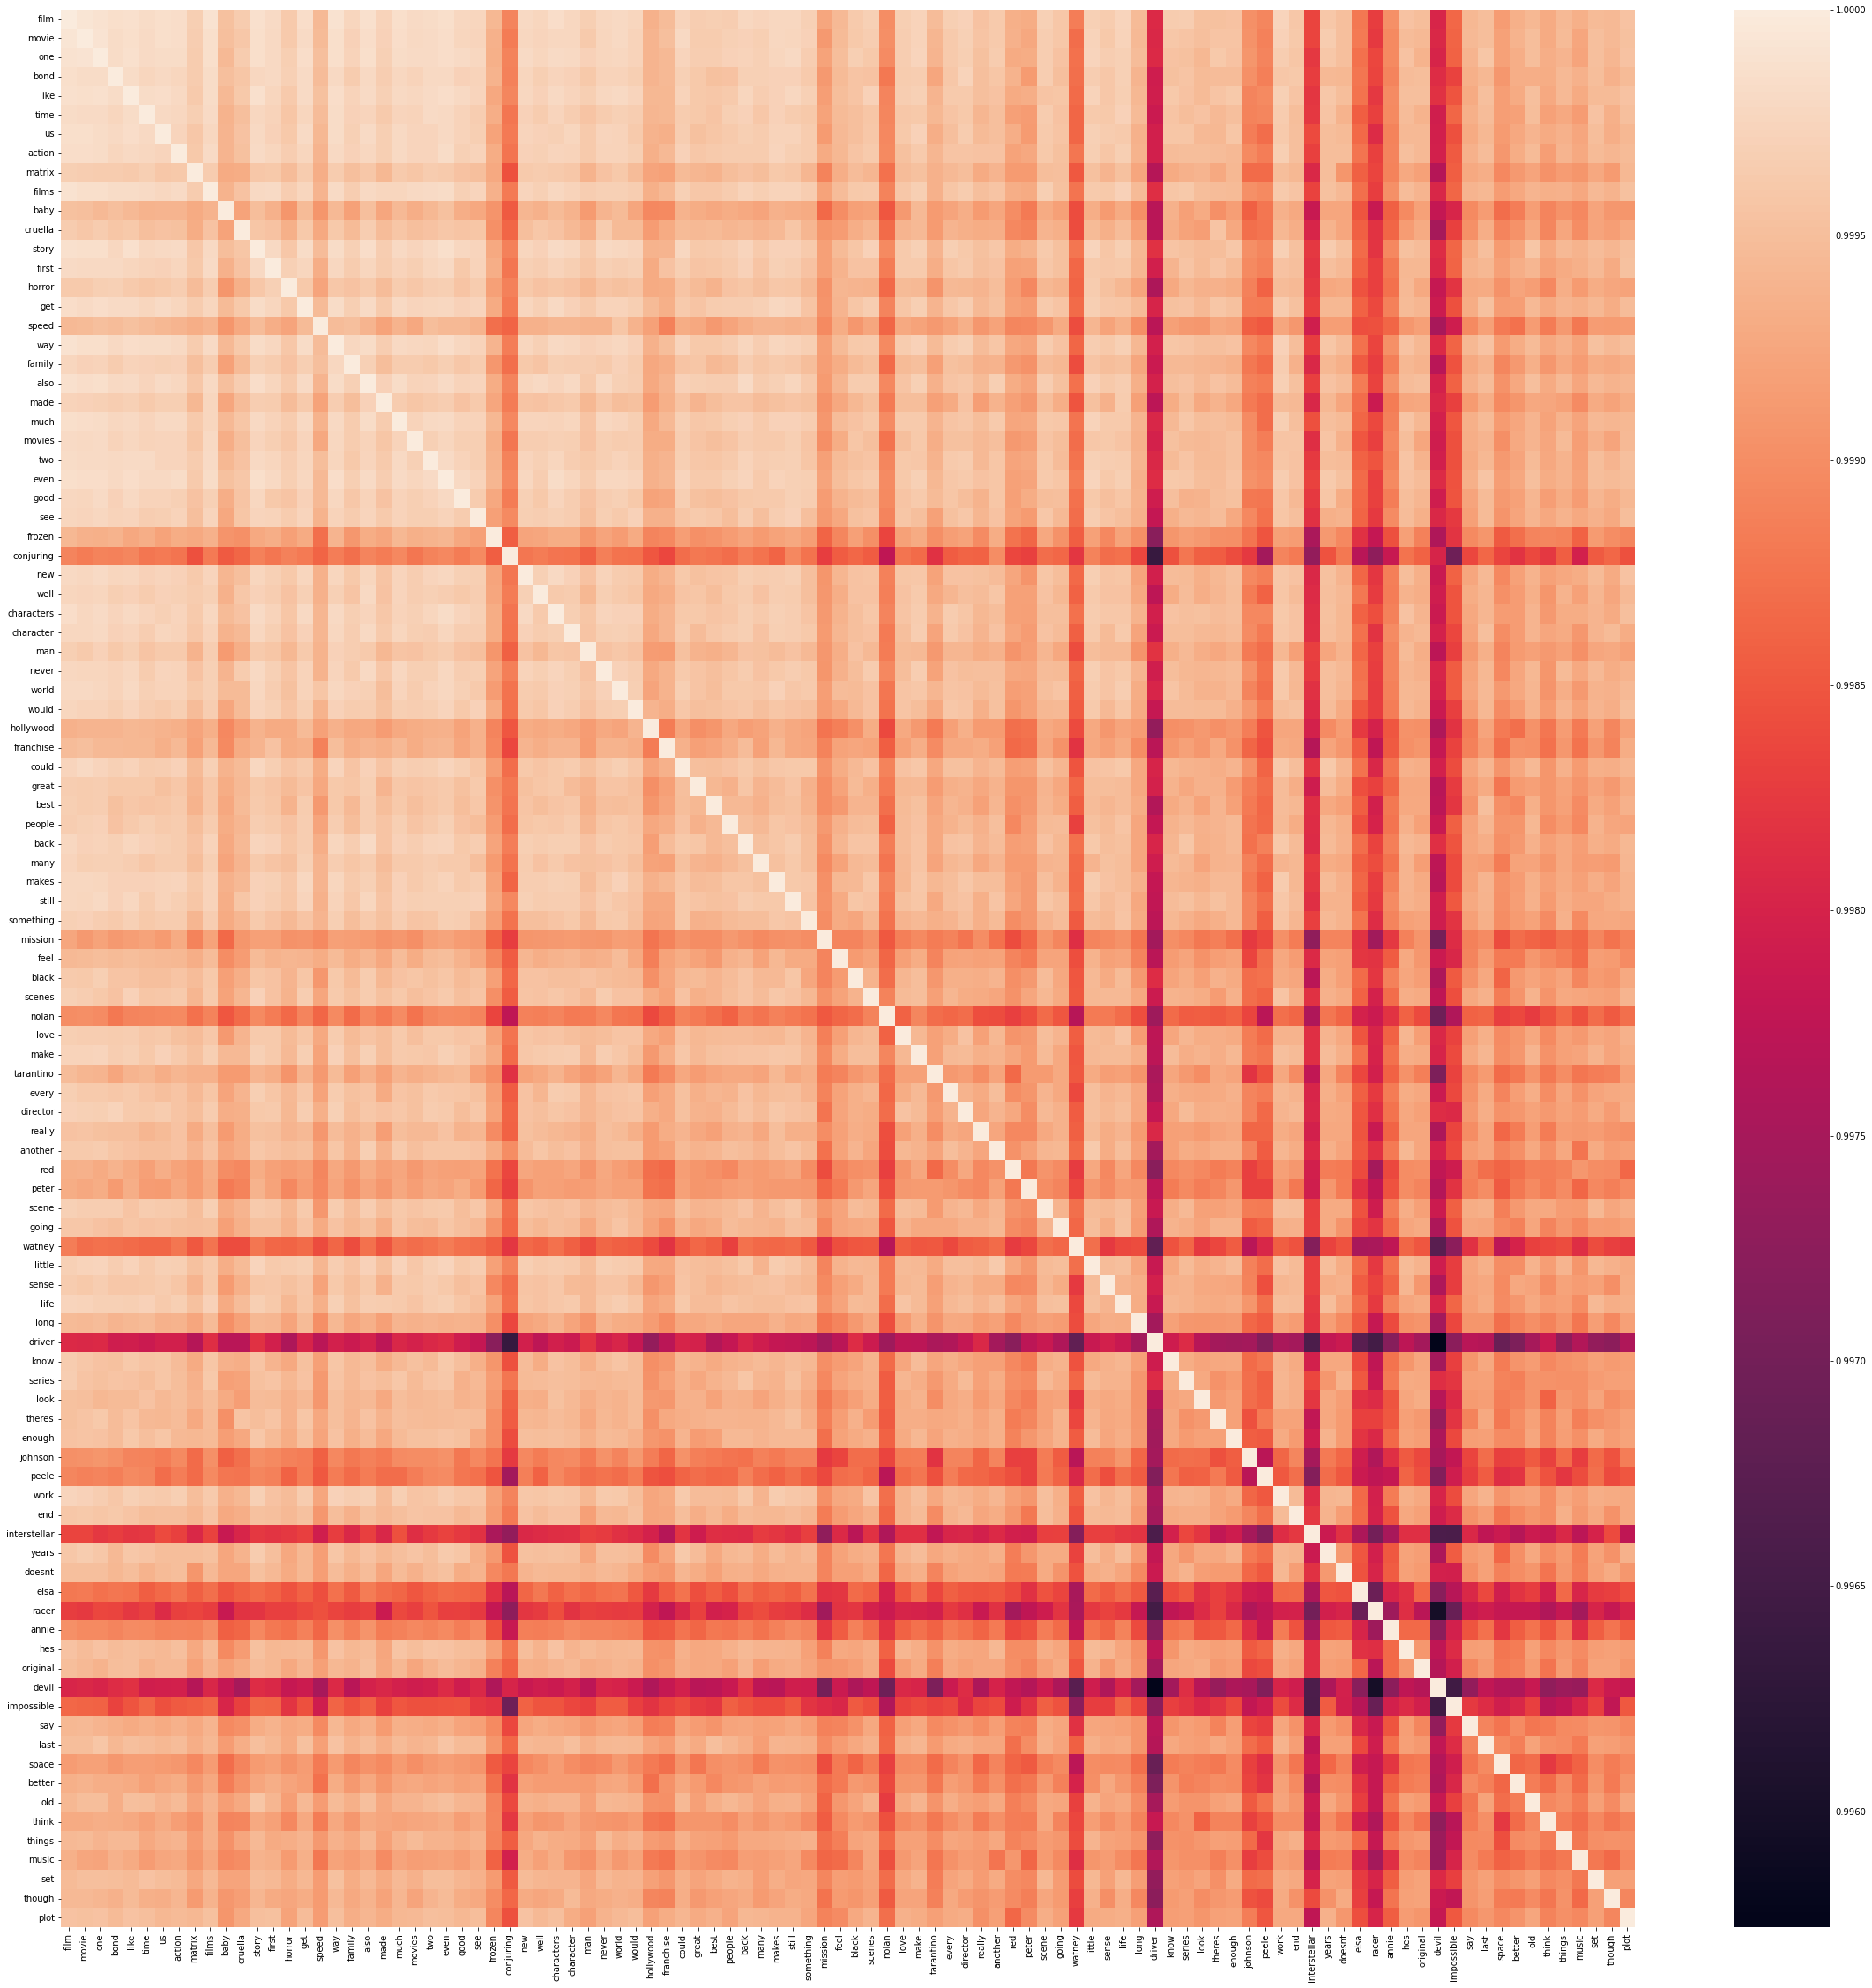

In [52]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(ax=ax, 
            data=similarities,
            xticklabels=top100_tfidf_word_vectors.index, 
            yticklabels=top100_tfidf_word_vectors.index)